In [9]:
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
import json

In [10]:
DATASETS_DIR = Path("data/")
DATASET = "hongkong"
# dataset = "OmniCityView3WithOffset"
# dataset = "BONAI"
DATASET_DIR = DATASETS_DIR / DATASET

In [11]:
def count_height():
    test_ann_path = DATASET_DIR / "coco" / "hongkong_test_roof.json"
    train_ann_path = DATASET_DIR / "coco" / "hongkong_trainval.json"
    height_count = defaultdict(int)
    for ann_path in (test_ann_path, train_ann_path):
        with open(ann_path, "r") as fp:
            content = json.load(fp)
        for ann in content["annotations"]:
            height = ann["building_height"]
            if height >= 200:
                height_count[200] += 1
            else:
                height_count[int(float(height) / 20) * 20] += 1
    # print(height_count)
    keys = list(sorted(height_count.keys()))
    values = []
    for key in keys:
        value = height_count[key]
        values.append(value)
        # print(f"{key}: {value}")
    return keys, values

In [12]:
def draw_hist(data, labels):
    # data = [5, 20, 15, 25, 10]
    # labels = ["Tom", "Dick", "Harry", "Slim", "Jim"]
    plt.xlabel('entry a')
    plt.ylabel('entry b')
    plt.bar(range(len(data)), data, tick_label=labels, width=0.8, align="edge")
    plt.show()


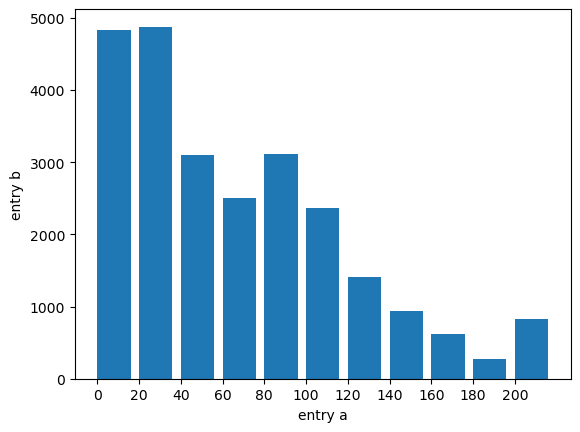

In [13]:
labels, data = count_height()
draw_hist(data, labels)